# Introduction to Neural Networks

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
C:\Users\nisht\Anaconda3_n\envs\LL\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nisht\Anaconda3_n\envs\LL\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nisht\Anaconda3_n\envs\LL\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nisht\Anaconda3_n\envs\LL\lib\site-packag

## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [6]:
X_train[0].shape

(28, 28)

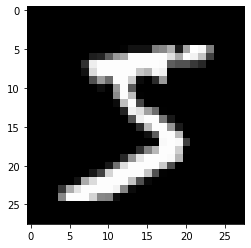

In [10]:
plt.imshow(X_train[0],cmap='gray')

In [11]:
y_train[0]

5

## Preprocessing the image data

In [12]:
image_height, image_width=28,28

In [13]:
X_train=X_train.reshape(60000,image_height*image_width)
X_test=X_test.reshape(10000,image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [15]:
print(X_train[0])
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [16]:
X_train=X_train/255.
X_test=X_test/255.
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [17]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [18]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [19]:
model=Sequential()

In [20]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10, activation='softmax'))

## Compile the model

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [23]:
history= model.fit(X_train, y_train, epochs=20 , validation_data=(X_test, y_test) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 57s 950us/step - loss: 0.1844 - acc: 0.9437 - val_loss: 0.0927 - val_acc: 0.9708
Epoch 2/20
60000/60000 [==============================] - 51s 849us/step - loss: 0.0792 - acc: 0.9750 - val_loss: 0.0872 - val_acc: 0.9735
Epoch 3/20
60000/60000 [==============================] - 55s 910us/step - loss: 0.0585 - acc: 0.9813 - val_loss: 0.0779 - val_acc: 0.9763
Epoch 4/20
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0412 - acc: 0.9868 - val_loss: 0.0782 - val_acc: 0.9781 - los
Epoch 5/20
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0350 - acc: 0.9885 - val_loss: 0.0794 - val_acc: 0.9793
Epoch 6/20
60000/60000 [==============================] - 55s 918us/step - loss: 0.0284 - acc: 0.9907 - val_loss: 0.0728 - val_acc: 0.9786
Epoch 7/20
60000/60000 [==============================] - 53s 876us/step - loss: 0.0259 - acc: 0.9918 - val_loss: 

## What is the accuracy of the model?

### Plot the accuracy of the training model

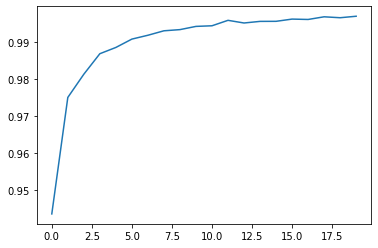

In [25]:
plt.plot(history.history['acc'])

### Plot the accuracy of training and validation set

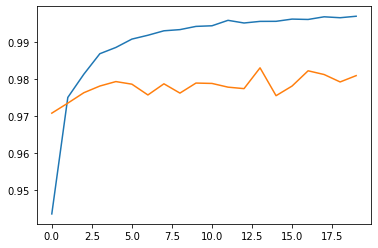

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

### Accuracy of training and validation with loss

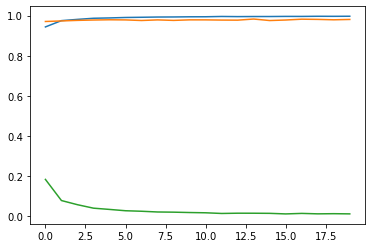

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])

In [28]:
score= model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 123us/step


In [29]:
score

[0.12287525079470084, 0.9809]

# Convolution Neural Network

## Import the libraries

In [30]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [32]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [35]:
batch_size = 128
num_classes = 10
epochs = 3

In [36]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [38]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total para

In [39]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 123s 2ms/step - loss: 0.9178 - acc: 0.6888 - val_loss: 0.3578 - val_acc: 0.8836
Epoch 2/20
60000/60000 [==============================] - 114s 2ms/step - loss: 0.3086 - acc: 0.9053 - val_loss: 0.3013 - val_acc: 0.9034
Epoch 3/20
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2404 - acc: 0.9263 - val_loss: 0.2132 - val_acc: 0.9338
Epoch 4/20
60000/60000 [==============================] - 106s 2ms/step - loss: 0.1968 - acc: 0.9400 - val_loss: 0.1875 - val_acc: 0.9423
Epoch 5/20
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1631 - acc: 0.9504 - val_loss: 0.1359 - val_acc: 0.9588
Epoch 6/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.1367 - acc: 0.9589 - val_loss: 0.1215 - val_acc: 0.9633
Epoch 7/20
60000/60000 [==============================] - 115s 2ms/step - loss: 0.1188 - acc: 0.9628 - val_loss: 0.1050 - 

Recall that when using neural networks we got good accuracy.

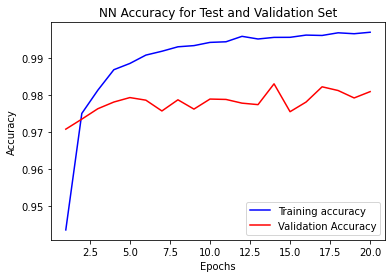

In [45]:
history_dict = history.history
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs,history.history['acc'], label='Training accuracy', color='blue')
plt.plot(epochs,history.history['val_acc'], label='Validation Accuracy', color='red')
plt.title('NN Accuracy for Test and Validation Set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Comparing this to using CNNs - the performance is far superior.

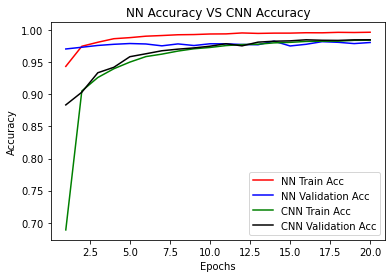

In [43]:
history_dict = history.history
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs,history.history['acc'],'b',label='NN Train Acc', color='red')
plt.plot(epochs, history.history['val_acc'], label='NN Validation Acc', color='blue')
plt.plot(epochs, history_cnn.history['acc'], label='CNN Train Acc', color='green')
plt.plot(epochs, history_cnn.history['val_acc'], label='CNN Validation Acc', color='black')

plt.title('NN Accuracy VS CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluate Model

In [46]:
score= cnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 5s 500us/step


In [47]:
score

[0.060780206872848797, 0.9814]

## Prediction

In [58]:
X_test[0].shape

(28, 28, 1)

In [59]:
x = np.expand_dims(X_test[0], axis=0)
x.shape

(1, 28, 28, 1)

In [61]:
result=cnn.predict(x)
single_result=result[0]
single_result

array([4.9520836e-09, 2.7690719e-06, 4.7271892e-06, 9.2083515e-05,
       9.7227934e-11, 3.0674062e-07, 2.0697428e-15, 9.9989665e-01,
       8.0600600e-08, 3.3535916e-06], dtype=float32)

In [62]:
most_likely_class_index = int(np.argmax(single_result))
most_likely_class_index

7

In [79]:
y_actual=np.where(y_test[0]==1.)
y_actual=y_actual[0]
y_actual

array([7], dtype=int64)

## Not related just testing out files

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
